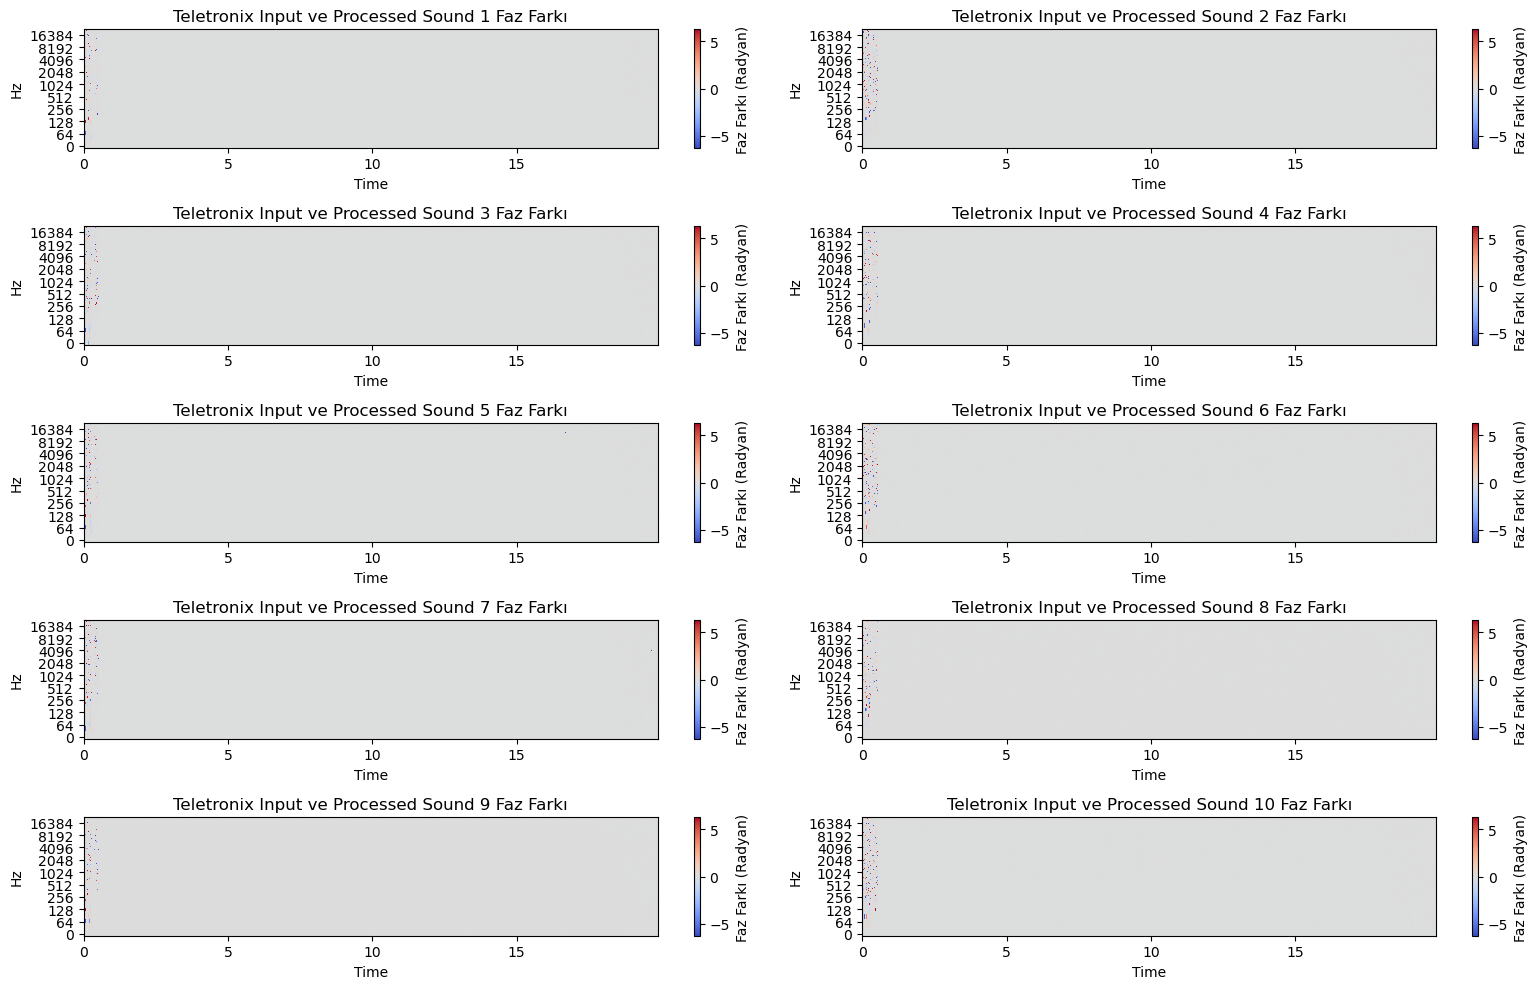

In [10]:
# Librosa sisteminin aktarılması
import matplotlib.pyplot as plt # Grafik ve görselleştirme işlemleri için Matplotlib kütüphanesini yükler.
import numpy as np # Bilimsel hesaplama ve dizi işlemleri için NumPy kütüphanesini yükler.
import librosa # Ses işleme ve analiz için Librosa kütüphanesini yükler.
import librosa.display # Librosa’nın ses grafikleri çizme fonksiyonlarını yükler.
import pyloudnorm as pyln  # LUFS analizini yapar.
import IPython.display as ipd # Ses dosyalarını Jupyter'da çalmak için gerekli IPython fonksiyonlarını yükler.
from IPython.display import Audio, display  # Ses dosyalarını Jupyter hücresinde oynatmaya olanak tanır.

# Disk üzerinde bulunan dosya yolu ile ses dosyalarının yollarını bir listeye ekleme
audio_files = [
    "/Users/nazimerensahin/Desktop/fldr/teletro.wav",  
    "/Users/nazimerensahin/Desktop/fldr/22.wav",      
    "/Users/nazimerensahin/Desktop/fldr/33.wav",
    "/Users/nazimerensahin/Desktop/fldr/44.wav",
    "/Users/nazimerensahin/Desktop/fldr/55.wav",
    "/Users/nazimerensahin/Desktop/fldr/66.wav",
    "/Users/nazimerensahin/Desktop/fldr/77.wav",
    "/Users/nazimerensahin/Desktop/fldr/88.wav",
    "/Users/nazimerensahin/Desktop/fldr/99.wav",
    "/Users/nazimerensahin/Desktop/fldr/1010.wav",
    "/Users/nazimerensahin/Desktop/fldr/1111.wav",
]

# Ses dosyalarını isimlendirir.
audio_labels = [
    "Teletronix Input",
    "Processed Sound 1",
    "Processed Sound 2",
    "Processed Sound 3",
    "Processed Sound 4",
    "Processed Sound 5",
    "Processed Sound 6",
    "Processed Sound 7",
    "Processed Sound 8",
    "Processed Sound 9",
    "Processed Sound 10",
]

# İlk dosyayı yükleme
y1, sr1 = librosa.load(audio_files[0], sr=None)

# Grafik düzeni gösterimi: İkili sütun (2 sütun)
rows = (len(audio_files) - 1) // 2 + (len(audio_files) - 1) % 2

# Grafik boyutlarının düzeni
plt.figure(figsize=(16, 2 * rows)) 

# İlk dosyayı diğer tüm ses dosyalarıyla kıyaslama
for i, (file, label) in enumerate(zip(audio_files[1:], audio_labels[1:]), start=2):
    y2, sr2 = librosa.load(file, sr=None)  # Diğer ses dosyasını yükle

    # STFT ile frekans dönüşümü
    S1 = librosa.stft(y1)
    S2 = librosa.stft(y2)

    # Faz bileşenlerini hesaplama
    phase1 = np.angle(S1)
    phase2 = np.angle(S2)

    # Faz farkını hesaplama
    phase_diff = phase1 - phase2

    # Alt grafik oluşturma
    plt.subplot(rows, 2, i - 1)
    librosa.display.specshow( 
        phase_diff, sr=sr1, x_axis="time", y_axis="log", cmap="coolwarm"
    ) # Faz farkı değerlerini zaman-frekans düzleminde görselleştirir.
    plt.colorbar(label="Faz Farkı (Radyan)") # Grafiğin yanında bir renk çubuğu (colorbar) ekler.
    plt.title(f"{audio_labels[0]} ve {label} Faz Farkı") # Alt grafik için başlık ekler.

# Genel düzenleme
plt.tight_layout()
plt.show()